In [1]:
import numpy as np
import matplotlib.pyplot as plt

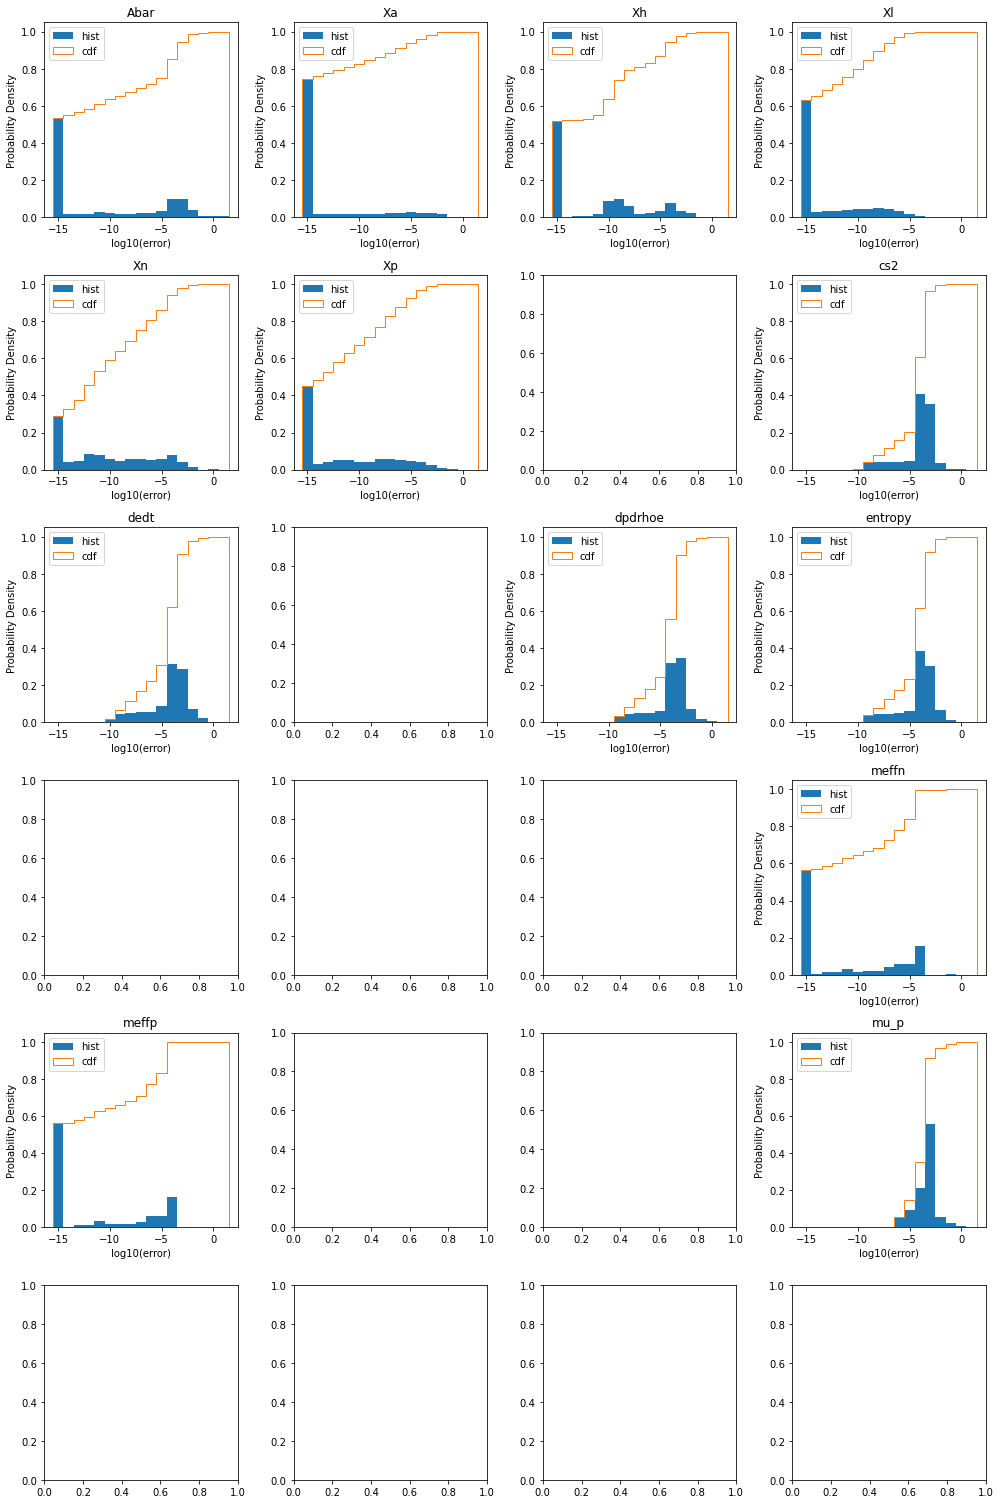

In [20]:
f_vars = ["Abar", "Xa", "Xh", "Xl", "Xn", "Xp", "Zbar", "cs2", 
        "dedt", "dpderho", "dpdrhoe", "entropy", "gamma", "logenergy", 
        "logpress", "meffn", "meffp", "mu_e", "mu_n", "mu_p", "muhat", 
        "munu"]

n_vars = len(f_vars)
# load vars and plot their errors
n_col = 4
n_rows = int(np.ceil(n_vars/float(n_col)))
fig, axs = plt.subplots(n_rows, n_col, figsize=[3.5*n_col, 3.5*n_rows])
for k, var in enumerate(f_vars):
    n_bins = 17
    # load var
    axs = np.atleast_2d(axs)
    i = k // n_col
    j = k % n_col
    try:
        errors_raw = np.load(f"./error_data_log_model_class/errors_{var}.npy", 'r')
    except:
        continue
    errors = errors_raw.copy()
    # remove infinities
    errors[errors > 10] = 10
    errors[errors < 1e-16] = 1e-16
    errors = np.log10(errors)
    axs[i,j].hist(errors.flatten(), align='right', bins=n_bins, density=True, range=[-16, 1], label='hist')
    axs[i,j].hist(errors.flatten(), align='right', bins=n_bins, density=True, range=[-16, 1], cumulative=True, histtype='step', label='cdf')
    axs[i,j].set_xlabel("log10(error)")
    axs[i,j].set_ylabel("Probability Density")
    axs[i,j].set_title(var)
    axs[i,j].legend(loc='upper left')
    
plt.tight_layout()
# plt.savefig("./error_plot_hist.png")
plt.show()

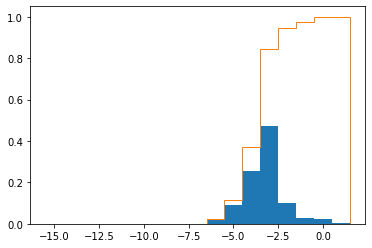

In [14]:
h, bins, o = plt.hist(errors.flatten(), align='right', bins=n_bins, density=True, range=[-16, 1], label='hist')
hc, binsc, oc = plt.hist(errors.flatten(), align='right', bins=n_bins, density=True, range=[-16, 1], label='hist', cumulative=True, histtype='step')

In [15]:
print(h)
print(hc)
sum(h)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02538276 0.09128428 0.25545907
 0.47322011 0.10159576 0.02910185 0.02216911 0.00178707]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02538276 0.11666703 0.3721261
 0.84534621 0.94694197 0.97604382 0.99821293 1.        ]


1.0

In [21]:
errors_raw.shape

(8388608,)

In [39]:
import h5py 

with h5py.File("../../../tables/SRO_subset_factor2.h5") as data:
    abar = data["Abar"]
    print(abar.shape)
    print(abar[32, 12, -1])

(65, 257, 513)
1.0


<Closed HDF5 dataset>